In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns; sns.set()
from scipy import stats

%matplotlib inline

from ema_workbench import (save_results, load_results)

In [2]:
def load_mode_map():
    with open('modemaps500.txt', 'rb') as f:
        ooi_clustered_mode = np.load(f)
    return ooi_clustered_mode

def calc_total_cells(mask):
    x = np.unique(mask, return_counts=True)[-1][-1]
    return x


src = 'C:/Users/Admin_2/Documents/Thesis/LUS/regionboundaries.asc'
a = np.loadtxt(src, skiprows=6)
mask = np.where((a == 24) | (a ==28 ), 0 , 1)
total_cells = calc_total_cells(mask)

#src = 'C:/Users/Admin_2/Documents/Thesis/LUS/Scenario_LUSmaps/STOOM.asc'
#b = np.loadtxt(src, skiprows=6)
#init_lu = b

src = 'C:/Users/Admin_2/Documents/Thesis/NewExperiments/DeltaScenariomaps/baseyear.asc'
b = np.loadtxt(src, skiprows=6)
b = np.where((b == 24) | (b ==28 ), 1 , b)

def see_difference(ooi, mask, luc, init_lu = b):
    '''
    0:outside
    1:No presence in both
    2:Presence in init, no presence in ooi
    3:No presence in init, presence in ooi
    4: Presence in both
    '''
    
    init=init_lu
    end=ooi
    
    mask1 = np.logical_and(init!=luc, end!=luc)
    diff_1 = np.where(mask1, 1, 99)
    mask2 = np.logical_and(init==luc, end!=luc)
    diff_2 = np.where(mask2, 2, 99)
    mask3 = np.logical_and(init!=luc, end==luc)
    diff_3 = np.where(mask3, 3, 99)
    mask4 = np.logical_and(init==luc, end==luc)
    diff_4 = np.where(mask4, 4, 99)
    
    diff = np.min([diff_1, diff_2, diff_3, diff_4], axis=0)
    
    diff = np.where(mask==1, diff, 0)
    
    return diff

def see_differencetwo(ooi, mask, luc1, luc2, init_lu=a):
    '''
    0:outside
    1:No presence in both
    2:Presence in init, no presence in ooi
    3:No presence in init, presence in ooi
    4: Presence in both
    '''
    
    init=init_lu
    end=ooi
    
    mask1 = np.logical_and(init!=luc, end!=luc)
    diff_1 = np.where(mask1, 1, 99)
    mask2 = np.logical_and(init==luc, end!=luc)
    diff_2 = np.where(mask2, 2, 99)
    mask3 = np.logical_and(init!=luc, end==luc)
    diff_3 = np.where(mask3, 3, 99)
    mask4 = np.logical_and(init==luc, end==luc)
    diff_4 = np.where(mask4, 4, 99)
    
    diff = np.min([diff_1, diff_2, diff_3, diff_4], axis=0)
    
    diff = np.where(mask==1, diff, 0)
    
    return diff

## Percentage change in acreage of each cluster

To inspect the overall land use change patterns for each cluster, the mode map is used to calculate the percentage change of each land use class compared to the base year 2012. 

### Get acreage of each land use type for each mode map

Here, for each cluster, the amount of acreage is calculated for the land use classes. 

The land use class ID's: 

ID Land use class	Land use class

- 0	Railway
- 1	Roads
- 2	Airports
- 3	Residential area
- 4	Industry and commerce
- 5	Services (also industry and commerce)
- 6	Sea ports (also industry and commerce) 
- 7	Building site
- 8	Semi hardened
- 9	Recreation 
- 10	Recreation accommodation
- 11	Gras in residential areas
- 12	Horticulture
- 13	Corn
- 14	Potatoes
- 15	Beets
- 16	Grain
- 17	Open vegetables
- 18	Flower bulbs
- 19	Livestock
- 20	Tree orchard
- 21	Arboriculture
- 22	Nature
- 23	Fresh water
- 24	Sea
- 25	Rivers
- 26	Other water


In [3]:
#Cluster 1
src = 'C:/Users/Admin_2/Documents/Thesis/NewExperiments/modemapsasc/cluster1_middlemap.asc'
cluster1 = np.loadtxt(src, skiprows=6)
unique, counts = np.unique(cluster1, return_counts=True)
cluster_1 = dict(zip(unique, counts))
df_cluster1 = pd.DataFrame(cluster_1.items(), columns=["ID", "Ha"])
#df_cluster1.to_excel("cluster1counts.xlsx")


In [4]:
#Cluster 2
src = 'C:/Users/Admin_2/Documents/Thesis/NewExperiments/modemapsasc/cluster2_middlemap.asc'
cluster2 = np.loadtxt(src, skiprows=6)
unique, counts = np.unique(cluster2, return_counts=True)
cluster_2 = dict(zip(unique, counts))
df_cluster2 = pd.DataFrame(cluster_2.items(), columns=["ID", "Ha"])
#df_cluster2.to_excel("cluster2counts.xlsx")

In [5]:
#Cluster 3
src = 'C:/Users/Admin_2/Documents/Thesis/NewExperiments/modemapsasc/cluster3_middlemap.asc'
cluster3 = np.loadtxt(src, skiprows=6)
unique, counts = np.unique(cluster3, return_counts=True)
cluster_3 = dict(zip(unique, counts))
df_cluster3 = pd.DataFrame(cluster_3.items(), columns=["ID", "Ha"])
#df_cluster3.to_excel("cluster3counts.xlsx")

In [6]:
#Cluster 4
src = 'C:/Users/Admin_2/Documents/Thesis/NewExperiments/modemapsasc/cluster4_middlemap.asc'
cluster4 = np.loadtxt(src, skiprows=6)
unique, counts = np.unique(cluster4, return_counts=True)
cluster_4 = dict(zip(unique, counts))
df_cluster4 = pd.DataFrame(cluster_4.items(), columns=["ID", "Ha"])
#df_cluster4.to_excel("cluster4counts.xlsx")

In [7]:
#Cluster 5
src = 'C:/Users/Admin_2/Documents/Thesis/NewExperiments/modemapsasc/cluster5_middlemap.asc'
cluster5 = np.loadtxt(src, skiprows=6)
unique, counts = np.unique(cluster5, return_counts=True)
cluster_5 = dict(zip(unique, counts))
df_cluster5 = pd.DataFrame(cluster_5.items(), columns=["ID", "Ha"])
#df_cluster5.to_excel("cluster5counts.xlsx")

In [8]:
#Cluster 6
src = 'C:/Users/Admin_2/Documents/Thesis/NewExperiments/modemapsasc/cluster6_middlemap.asc'
cluster6 = np.loadtxt(src, skiprows=6)
unique, counts = np.unique(cluster6, return_counts=True)
cluster_6 = dict(zip(unique, counts))
df_cluster6 = pd.DataFrame(cluster_6.items(), columns=["ID", "Ha"])
#df_cluster6.to_excel("cluster6counts.xlsx")

### Get acreage base year and Delta Scenarios

In [9]:
#Baseyear
src = 'C:/Users/Admin_2/Documents/Thesis/NewExperiments/DeltaScenariomaps/baseyear.asc'
baseyear = np.loadtxt(src, skiprows=6)
unique, counts = np.unique(baseyear, return_counts=True)
baseyear_dict = dict(zip(unique, counts))
df_baseyear = pd.DataFrame(baseyear_dict.items(), columns=["ID", "Ha"])
#df_baseyear.to_excel("baseyearcounts.xlsx")

In [10]:
#STOOM
src = 'C:/Users/Admin_2/Documents/Thesis/NewExperiments/DeltaScenariomaps/STOOM.asc'
STOOM = np.loadtxt(src, skiprows=6)
unique, counts = np.unique(STOOM, return_counts=True)
STOOM_dict = dict(zip(unique, counts))
df_STOOM = pd.DataFrame(STOOM_dict.items(), columns=["ID", "Ha"])
#df_STOOM.to_excel("STOOMcounts.xlsx")

In [11]:
#DRUK
src = 'C:/Users/Admin_2/Documents/Thesis/NewExperiments/DeltaScenariomaps/DRUK.asc'
DRUK = np.loadtxt(src, skiprows=6)
unique, counts = np.unique(DRUK, return_counts=True)
DRUK_dict = dict(zip(unique, counts))
df_DRUK = pd.DataFrame(DRUK_dict.items(), columns=["ID", "Ha"])
#df_DRUK.to_excel("DRUKcounts.xlsx")

In [12]:
#WARM
src = 'C:/Users/Admin_2/Documents/Thesis/NewExperiments/DeltaScenariomaps/WARM.asc'
WARM = np.loadtxt(src, skiprows=6)
unique, counts = np.unique(WARM, return_counts=True)
WARM_dict = dict(zip(unique, counts))
df_WARM = pd.DataFrame(WARM_dict.items(), columns=["ID", "Ha"])
#df_WARM.to_excel("WARMcounts.xlsx")

In [13]:
#RUST
src = 'C:/Users/Admin_2/Documents/Thesis/NewExperiments/DeltaScenariomaps/RUST.asc'
RUST = np.loadtxt(src, skiprows=6)
unique, counts = np.unique(RUST, return_counts=True)
RUST_dict = dict(zip(unique, counts))
df_RUST = pd.DataFrame(RUST_dict.items(), columns=["ID", "Ha"])
#df_RUST.to_excel("RUSTcounts.xlsx")

After calculating the percentage change, a heatmap is created to visualize the land use pattern change of each cluster. (The percentage calculation is done in excel).

In [14]:
d = { 'STOOM': [35,43,27,12,-10,-4,-11], 'DRUK' : [12,35,28,17,-9,-4,-9], 'RUST' : [4,6,8,8,-28,-13,-2], 'WARM' : [11,5,8,8,-28,-13,-3],'Cluster 1': [4,6,7,8,-9,-4,-3], 'Cluster 2': [35,43,7,8,-9,-4,-9], 'Cluster 3': [35,43,27,8,-9,-4,-10], 'Cluster 4':[11,5,7,8,-9,-4,-4], 'Cluster 5': [12,35,7,8,-9,-4,-5],'Cluster 6': [12,44,7,12,-9,-4,-7] }

In [15]:
df = pd.DataFrame(d, index =['Residential', 'Industry & commerce', 'Recreation', 'Nature', 'Horticulture', 'Intensive agriculture', 'Extensive agriculture'] )
df

,STOOM,DRUK,RUST,WARM,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6
Residential,35,12,4,11,4,35,35,11,12,12
Industry & commerce,43,35,6,5,6,43,43,5,35,44
Recreation,27,28,8,8,7,7,27,7,7,7
Nature,12,17,8,8,8,8,8,8,8,12
Horticulture,-10,-9,-28,-28,-9,-9,-9,-9,-9,-9
Intensive agriculture,-4,-4,-13,-13,-4,-4,-4,-4,-4,-4
Extensive agriculture,-11,-9,-2,-3,-3,-9,-10,-4,-5,-7


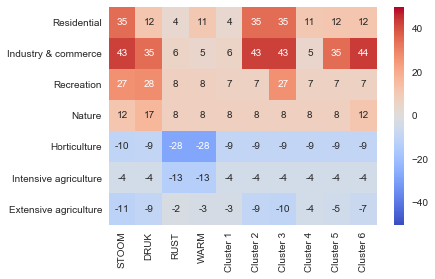

In [17]:
ax = sns.heatmap(df, annot = True, vmin=-50, vmax=50, cmap='coolwarm', center = 0)
sns_hist = ax
fig = sns_hist.get_figure()
fig.savefig('C:/Users/Admin_2/Documents/Thesis/NewExperiments/hist2.png', dpi=1200, bbox_inches = "tight")

In [35]:
d = {'Cluster 1': [4,6,7,8,-9,-4,-3], 'Cluster 2': [35,43,7,8,-9,-4,-9], 'Cluster 3': [35,43,27,8,-9,-4,-10], 'Cluster 4':[11,5,7,8,-9,-4,-4], 'Cluster 5': [12,35,7,8,-9,-4,-5],'Cluster 6': [12,44,7,12,-9,-4,-7] }

In [36]:
a = {'STOOM': [32,46,27,9,-10,-4,-11], 'DRUK' : [15,40,28,17,-10,-4,-9], 'RUST' : [4,6,8,1,-19,-13,0], 'WARM' : [11,5,8,1,-19,-13,-1]}

In [37]:
df = pd.DataFrame(d, index =['Residential', 'Industry & commerce', 'Recreation', 'Nature', 'Horticulture', 'Intensive agriculture', 'Extensive agriculture'] )
df

,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6
Residential,4,35,35,11,12,12
Industry & commerce,6,43,43,5,35,44
Recreation,7,7,27,7,7,7
Nature,8,8,8,8,8,12
Horticulture,-9,-9,-9,-9,-9,-9
Intensive agriculture,-4,-4,-4,-4,-4,-4
Extensive agriculture,-3,-9,-10,-4,-5,-7


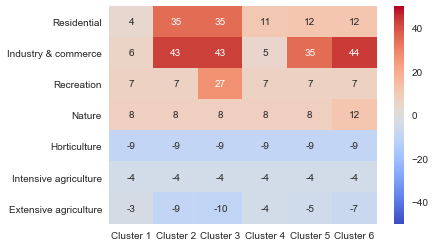

In [20]:
ax = sns.heatmap(df, annot = True, vmin=-50, vmax=50, cmap='coolwarm', center = 0)
sns_hist = ax
fig = sns_hist.get_figure()
fig.savefig('C:/Users/Admin_2/Documents/Thesis/NewExperiments/hist.png', dpi=1200, bbox_inches = "tight")

## Visualize each mode map

To get nice maps, the colours are changed, by changing the land use ID's. Also, some land use classes are combined to focus on the largerst land use classes.

The new land use ID's are: 
- 4 Semi hardened
- 6  Nature
- 8 Industry and commerce
- 9 Recreation 
- 11 horticulture
- 12 Grass in residential areas
- 18 Intensive agriculture
- 23 Extensive agriculture
- 25 Fresh water

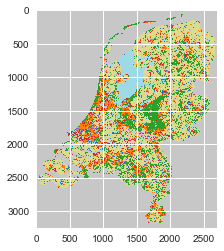

In [14]:
src = 'C:/Users/Admin_2/Documents/Thesis/NewExperiments/DeltaScenariomaps/STOOM.asc'
b = np.loadtxt(src, skiprows=6)
base  = b
base1 = np.where((b == 24) | (b ==28 ), 20 , base)
base1 = np.where((base == 23), 25 , base1)
base1 = np.where((base == 22), 6, base1)
base1= np.where((base == 13) |(base == 14)| (base == 15)| (base == 16)| (base == 17)| (base == 19) , 23 , base1)
base1 = np.where((base == 12), 11, base1)
base1 = np.where((base == 11), 12, base1)
base1 = np.where((base == 18) |(base == 20)| (base == 21) , 18 , base1)
base1 = np.where((base== 4) |(base == 5)| (base == 6) , 8 , base1)
base1 = np.where((base == 8), 4, base1)
STOOM = np.where((base == 9) |(base == 10), 9 , base1)
plt.imshow(STOOM, cmap='tab20')
#plt.imsave('C:/Users/Admin_2/Documents/Thesis/NewExperiments/pngmaps/STOOM_new.png', STOOM, cmap='tab20')

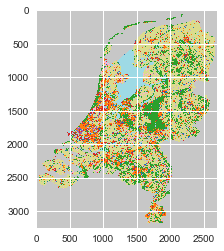

In [15]:
src = 'C:/Users/Admin_2/Documents/Thesis/NewExperiments/DeltaScenariomaps/DRUK.asc'
b = np.loadtxt(src, skiprows=6)
base  = b
base1 = np.where((b == 24) | (b ==28 ), 20 , base)
base1 = np.where((base == 23), 25 , base1)
base1 = np.where((base == 22), 6, base1)
base1= np.where((base == 13) |(base == 14)| (base == 15)| (base == 16)| (base == 17)| (base == 19) , 23 , base1)
base1 = np.where((base == 12), 11, base1)
base1 = np.where((base == 11), 12, base1)
base1 = np.where((base == 18) |(base == 20)| (base == 21) , 18 , base1)
base1 = np.where((base== 4) |(base == 5)| (base == 6) , 8 , base1)
base1 = np.where((base == 8), 4, base1)
DRUK= np.where((base == 9) |(base == 10), 9 , base1)
plt.imshow(DRUK, cmap='tab20')
#plt.imsave('C:/Users/Admin_2/Documents/Thesis/NewExperiments/pngmaps/DRUK_new.png', DRUK, cmap='tab20')

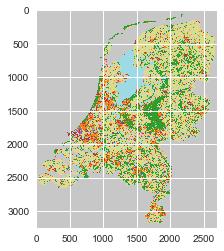

In [16]:
src = 'C:/Users/Admin_2/Documents/Thesis/NewExperiments/DeltaScenariomaps/RUST.asc'
b = np.loadtxt(src, skiprows=6)
base  = b
base1 = np.where((b == 24) | (b ==28 ), 20 , base)
base1 = np.where((base == 23), 25 , base1)
base1 = np.where((base == 22), 6, base1)
base1= np.where((base == 13) |(base == 14)| (base == 15)| (base == 16)| (base == 17)| (base == 19) , 23 , base1)
base1 = np.where((base == 12), 11, base1)
base1 = np.where((base == 11), 12, base1)
base1 = np.where((base == 18) |(base == 20)| (base == 21) , 18 , base1)
base1 = np.where((base== 4) |(base == 5)| (base == 6) , 8 , base1)
base1 = np.where((base == 8), 4, base1)
RUST = np.where((base == 9) |(base == 10), 9 , base1)
plt.imshow(RUST, cmap='tab20')
#plt.imsave('C:/Users/Admin_2/Documents/Thesis/NewExperiments/pngmaps/rust_new.png', RUST, cmap='tab20')

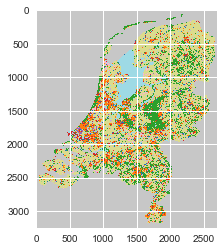

In [52]:
src = 'C:/Users/Admin_2/Documents/Thesis/NewExperiments/DeltaScenariomaps/WARM.asc'
b = np.loadtxt(src, skiprows=6)
base  = b
base1 = np.where((b == 24) | (b ==28 ), 20 , base)
base1 = np.where((base == 23), 25 , base1)
base1 = np.where((base == 22), 6, base1)
base1= np.where((base == 13) |(base == 14)| (base == 15)| (base == 16)| (base == 17)| (base == 19) , 23 , base1)
base1 = np.where((base == 12), 11, base1)
base1 = np.where((base == 11), 12, base1)
base1 = np.where((base == 18) |(base == 20)| (base == 21) , 18 , base1)
base1 = np.where((base== 4) |(base == 5)| (base == 6) , 8 , base1)
base1 = np.where((base == 8), 4, base1)
WARM = np.where((base == 9) |(base == 10), 9 , base1)
plt.imshow(WARM, cmap='tab20')
plt.imsave('C:/Users/Admin_2/Documents/Thesis/NewExperiments/pngmaps/warm_new.png', WARM, cmap='tab20')

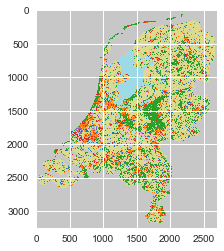

In [23]:
src = 'C:/Users/Admin_2/Documents/Thesis/NewExperiments/DeltaScenariomaps/baseyear.asc'
b = np.loadtxt(src, skiprows=6)
base  = b
base1 = np.where((b == 24) | (b ==28 ), 20 , base)
base1 = np.where((base == 23), 25 , base1)
base1 = np.where((base == 22), 6, base1)
base1= np.where((base == 13) |(base == 14)| (base == 15)| (base == 16)| (base == 17)| (base == 19) , 23 , base1)
base1 = np.where((base == 12), 11, base1)
base1 = np.where((base == 11), 12, base1)
base1 = np.where((base == 18) |(base == 20)| (base == 21) , 18 , base1)
base1 = np.where((base== 4) |(base == 5)| (base == 6) , 8 , base1)
base1 = np.where((base == 8), 4, base1)
base1 = np.where((base == 9) |(base == 10), 9 , base1)
plt.imshow(base1, cmap='tab20')
init_lu = base1
#plt.imsave('C:/Users/Admin_2/Documents/Thesis/NewExperiments/pngmaps/baseyear_new.png', base1, cmap='tab20')

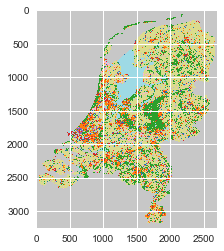

In [24]:
src = 'C:/Users/Admin_2/Documents/Thesis/NewExperiments/modemapsasc/cluster1_middlemap.asc'
b = np.loadtxt(src, skiprows=6)
cl1  = b
cl1a = np.where((b == 24) | (b ==28 ), 20 , cl1)
cl1a = np.where((cl1 == 23), 25 , cl1a)
cl1a = np.where((cl1 == 22), 6, cl1a)
cl1a = np.where((cl1 == 13) |(cl1 == 14)| (cl1 == 15)| (cl1 == 16)| (cl1 == 17)| (cl1 == 19) , 23 , cl1a)
cl1a = np.where((cl1 == 12), 11, cl1a)
cl1a = np.where((cl1 == 11), 12, cl1a)
cl1a = np.where((cl1 == 18) |(cl1 == 20)| (cl1 == 21) , 18 , cl1a)
cl1a = np.where((cl1 == 4) |(cl1 == 5)| (cl1 == 6) , 8 , cl1a)
cl1a = np.where((cl1 == 8), 4, cl1a)
cl1a = np.where((cl1 == 9) |(cl1 == 10), 9 , cl1a)
plt.imshow(cl1a, cmap='tab20')
plt.imsave('C:/Users/Admin_2/Documents/Thesis/NewExperiments/pngmaps/cluster1_new.png', cl1a, cmap='tab20')

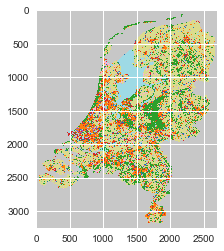

In [25]:
src = 'C:/Users/Admin_2/Documents/Thesis/NewExperiments/modemapsasc/cluster2_middlemap.asc'
b = np.loadtxt(src, skiprows=6)
cl2  = b
cl2a = np.where((b == 24) | (b ==28 ), 20 , cl2)
cl2a = np.where((cl2 == 23), 25 , cl2a)
cl2a = np.where((cl2 == 22), 6, cl2a)
cl2a = np.where((cl2 == 13) |(cl2 == 14)| (cl2 == 15)| (cl2 == 16)| (cl2 == 17)| (cl2 == 19) , 23 , cl2a)
cl2a = np.where((cl2 == 12), 11, cl2a)
cl2a = np.where((cl2 == 11), 12, cl2a)
cl2a = np.where((cl2 == 18) |(cl2 == 20)| (cl2 == 21) , 18 , cl2a)
cl2a = np.where((cl2 == 4) |(cl2 == 5)| (cl2 == 6) , 8 , cl2a)
cl2a = np.where((cl2 == 8), 4, cl2a)
cl2a = np.where((cl2 == 9) |(cl2 == 10), 9 , cl2a)
plt.imshow(cl2a, cmap='tab20')
plt.imsave('C:/Users/Admin_2/Documents/Thesis/NewExperiments/pngmaps/cluster2_new.png', cl2a, cmap='tab20')

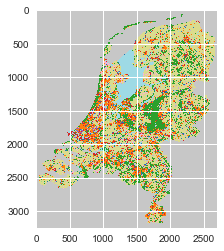

In [26]:
src = 'C:/Users/Admin_2/Documents/Thesis/NewExperiments/modemapsasc/cluster3_middlemap.asc'
b = np.loadtxt(src, skiprows=6)
cl3  = b
cl3a = np.where((b == 24) | (b ==28 ), 20 , cl3)
cl3a = np.where((cl3 == 23), 25 , cl3a)
cl3a = np.where((cl3 == 22), 6, cl3a)
cl3a = np.where((cl3 == 13) |(cl3 == 14)| (cl3 == 15)| (cl3 == 16)| (cl3 == 17)| (cl3 == 19) , 23 , cl3a)
cl3a = np.where((cl3 == 12), 11, cl3a)
cl3a = np.where((cl3 == 11), 12, cl3a)
cl3a = np.where((cl3 == 18) |(cl3 == 20)| (cl3 == 21) , 18 , cl3a)
cl3a = np.where((cl3 == 4) |(cl3 == 5)| (cl3 == 6) , 8 , cl3a)
cl3a = np.where((cl3 == 8), 4, cl3a)
cl3a = np.where((cl3 == 9) |(cl3 == 10), 9 , cl3a)
plt.imshow(cl3a, cmap='tab20')
plt.imsave('C:/Users/Admin_2/Documents/Thesis/NewExperiments/pngmaps/cluster3_new.png', cl3a, cmap='tab20')

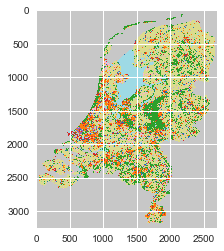

In [27]:
src = 'C:/Users/Admin_2/Documents/Thesis/NewExperiments/modemapsasc/cluster4_middlemap.asc'
b = np.loadtxt(src, skiprows=6)
cl4  = b
cl4a = np.where((b == 24) | (b ==28 ), 20 , cl4)
cl4a = np.where((cl4 == 23), 25 , cl4a)
cl4a = np.where((cl4 == 22), 6, cl4a)
cl4a = np.where((cl4 == 13) |(cl4 == 14)| (cl4 == 15)| (cl4 == 16)| (cl4 == 17)| (cl4 == 19) , 23 , cl4a)
cl4a = np.where((cl4 == 12), 11, cl4a)
cl4a = np.where((cl4 == 11), 12, cl4a)
cl4a = np.where((cl4 == 18) |(cl4 == 20)| (cl4 == 21) , 18 , cl4a)
cl4a = np.where((cl4 == 4) |(cl4 == 5)| (cl4 == 6) , 8 , cl4a)
cl4a = np.where((cl4 == 8), 4, cl4a)
cl4a = np.where((cl4 == 9) |(cl4 == 10), 9 , cl4a)
plt.imshow(cl4a, cmap='tab20')
plt.imsave('C:/Users/Admin_2/Documents/Thesis/NewExperiments/pngmaps/cluster4_new.png', cl4a, cmap='tab20')

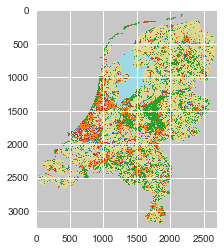

In [28]:
src = 'C:/Users/Admin_2/Documents/Thesis/NewExperiments/modemapsasc/cluster5_middlemap.asc'
b = np.loadtxt(src, skiprows=6)
cl5  = b
cl5a = np.where((b == 24) | (b ==28 ), 20 , cl5)
cl5a = np.where((cl5 == 23), 25 , cl5a)
cl5a = np.where((cl5 == 22), 6, cl5a)
cl5a = np.where((cl5 == 13) |(cl5 == 14)| (cl5 == 15)| (cl5 == 16)| (cl5 == 17)| (cl5 == 19) , 23 , cl5a)
cl5a = np.where((cl5 == 12), 11, cl5a)
cl5a = np.where((cl5 == 11), 12, cl5a)
cl5a = np.where((cl5 == 18) |(cl5 == 20)| (cl5 == 21) , 18 , cl5a)
cl5a = np.where((cl5 == 4) |(cl5 == 5)| (cl5 == 6) , 8 , cl5a)
cl5a = np.where((cl5 == 8), 4, cl5a)
cl5a = np.where((cl5 == 9) |(cl5 == 10), 9 , cl5a)
plt.imshow(cl5a, cmap='tab20')
plt.imsave('C:/Users/Admin_2/Documents/Thesis/NewExperiments/pngmaps/cluster5_new.png', cl5a, cmap='tab20')

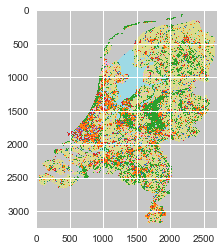

In [29]:
src = 'C:/Users/Admin_2/Documents/Thesis/NewExperiments/modemapsasc/cluster6_middlemap.asc'
b = np.loadtxt(src, skiprows=6)
cl6 = b
cl6a = np.where((b == 24) | (b ==28 ), 20 , cl6)
cl6a = np.where((cl6 == 23), 25 , cl6a)
cl6a = np.where((cl6 == 22), 6, cl6a)
cl6a = np.where((cl6 == 13) |(cl6 == 14)| (cl6 == 15)| (cl6 == 16)| (cl6 == 17)| (cl6 == 19) , 23 , cl6a)
cl6a = np.where((cl6 == 12), 11, cl6a)
cl6a = np.where((cl6 == 11), 12, cl6a)
cl6a = np.where((cl6 == 18) |(cl6 == 20)| (cl6 == 21) , 18 , cl6a)
cl6a = np.where((cl6 == 4) |(cl6 == 5)| (cl6 == 6) , 8 , cl6a)
cl6a = np.where((cl6 == 8), 4, cl6a)
cl6a = np.where((cl6 == 9) |(cl6 == 10), 9 , cl6a)
plt.imshow(cl6a, cmap='tab20')
plt.imsave('C:/Users/Admin_2/Documents/Thesis/NewExperiments/pngmaps/cluster6_new.png', cl6a, cmap='tab20')

### Visualize difference in land use patterns

Here, you can visualise the differences between land use maps per land use class.

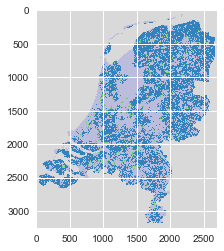

In [48]:
differencebase1andWARM22 = see_difference(cl6a, mask, 23, init_lu=base1)
plt.imshow(differencebase1andWARM22, cmap='tab20c_r')
plt.imsave('C:/Users/Admin_2/Documents/Thesis/NewExperiments/modemapsasc/differenceextensive6', differencebase1andWARM22, cmap='tab20c_r')

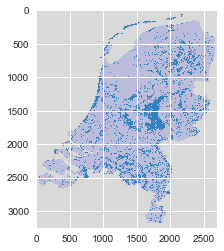

In [31]:
differencebase1andbaseyear22 = see_difference(base1, mask, 6, init_lu=base1)
plt.imshow(differencebase1andbaseyear22, cmap='tab20c_r')
plt.imsave('C:/Users/Admin_2/Documents/Thesis/NewExperiments/modemapsasc/differencebase1andbaseyear22', differencebase1andbaseyear22, cmap='tab20c_r')

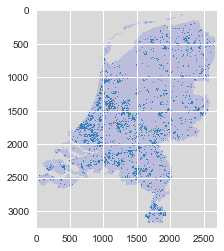

In [32]:
differenceCL1andbaseyear3 = see_difference(cl2a, mask, 3, init_lu=STOOM)
plt.imshow(differenceCL1andbaseyear3, cmap='tab20c_r')
plt.imsave('C:/Users/Admin_2/Documents/Thesis/NewExperiments/modemapsasc/differenceSTOOMandCL2r3', differenceCL1andbaseyear3, cmap='tab20c_r')

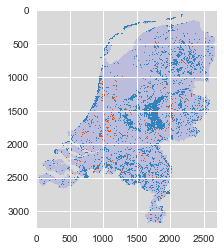

In [270]:
differenceCL2andbaseyear22 = see_difference(cl2a, mask, 6, init_lu=base1)
plt.imshow(differenceCL2andbaseyear22, cmap='tab20c_r')
plt.imsave('C:/Users/Admin_2/Documents/Thesis/NewExperiments/modemapsasc/differenceCL2andbaseyear22', differenceCL2andbaseyear22, cmap='tab20c_r')

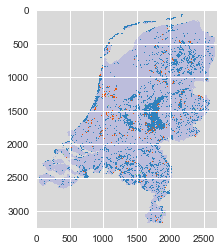

In [271]:
differenceCL3andbaseyear22 = see_difference(cl3a, mask, 6, init_lu=base1)
plt.imshow(differenceCL3andbaseyear22, cmap='tab20c_r')
plt.imsave('C:/Users/Admin_2/Documents/Thesis/NewExperiments/modemapsasc/differenceCL3andbaseyear22', differenceCL3andbaseyear22, cmap='tab20c_r')

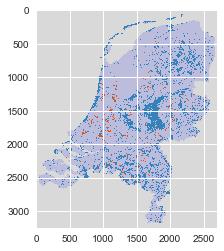

In [272]:
differenceCL4andbaseyear22 = see_difference(cl4a, mask, 6, init_lu=base1)
plt.imshow(differenceCL4andbaseyear22, cmap='tab20c_r')
plt.imsave('C:/Users/Admin_2/Documents/Thesis/NewExperiments/modemapsasc/differenceCL4andbaseyear22', differenceCL4andbaseyear22, cmap='tab20c_r')

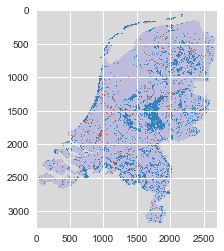

In [273]:
differenceCL5andbaseyear22 = see_difference(cl5a, mask, 6, init_lu=base1)
plt.imshow(differenceCL5andbaseyear22, cmap='tab20c_r')
plt.imsave('C:/Users/Admin_2/Documents/Thesis/NewExperiments/modemapsasc/differenceCL5andbaseyear22', differenceCL5andbaseyear22, cmap='tab20c_r')

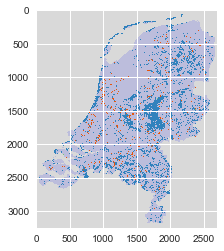

In [274]:
differenceCL6andbaseyear22 = see_difference(cl6a, mask, 6, init_lu=base1)
plt.imshow(differenceCL6andbaseyear22, cmap='tab20c_r')
plt.imsave('C:/Users/Admin_2/Documents/Thesis/NewExperiments/modemapsasc/differenceCL6andbaseyear22', differenceCL6andbaseyear22, cmap='tab20c_r')